In [74]:
!pip install nba_api --q

## Playtypes

In [231]:
from nba_api.stats.endpoints import synergyplaytypes
import numpy as np
import pandas as pd

df = synergyplaytypes.SynergyPlayTypes(per_mode_simple = 'PerGame', player_or_team_abbreviation = 'T',
                                       season_type_all_star = 'Regular Season', season = '2024-25',
                                       play_type_nullable = 'OffRebound', type_grouping_nullable = 'Defensive').get_data_frames()[0]

In [232]:
#For PPP - Lower is Better on Defense, Higher is Better on Offense
df.sort_values(by = ['PPP'], ascending = True, inplace = True)
df['rk'] = list(range(1, 31))
df.loc[df['TEAM_ABBREVIATION'] == 'SAS']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,PLAY_TYPE,TYPE_GROUPING,PERCENTILE,GP,POSS_PCT,PPP,...,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA,FGMX,rk
26,22024,1610612759,SAS,San Antonio Spurs,OffRebound,Defensive,0.241,26,0.055,1.131,...,0.094,0.031,0.556,0.591,6.2,7.0,3.1,5.3,2.2,23


In [233]:
#For POSS
df.sort_values(by = ['POSS'], ascending = True, inplace = True)
df['rk'] = list(range(1, 31))
df.loc[df['TEAM_ABBREVIATION'] == 'SAS']

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,PLAY_TYPE,TYPE_GROUPING,PERCENTILE,GP,POSS_PCT,PPP,...,SF_POSS_PCT,PLUSONE_POSS_PCT,SCORE_POSS_PCT,EFG_PCT,POSS,PTS,FGM,FGA,FGMX,rk
26,22024,1610612759,SAS,San Antonio Spurs,OffRebound,Defensive,0.241,26,0.055,1.131,...,0.094,0.031,0.556,0.591,6.2,7.0,3.1,5.3,2.2,26


In [234]:
#For TOV_POSS_PCT
df.sort_values(by = ['TOV_POSS_PCT'], ascending = False, inplace = True)
df['rk'] = list(range(1, 31))
df.loc[df['TEAM_ABBREVIATION'] == 'SAS', ['TEAM_NAME', 'TOV_POSS_PCT', 'rk']]

,TEAM_NAME,TOV_POSS_PCT,rk
26,San Antonio Spurs,0.069,20


## Rotation

In [79]:
from nba_api.stats.endpoints import gamerotation, leaguegamelog
import numpy as np
import pandas as pd
from tqdm import tqdm

games = leaguegamelog.LeagueGameLog(direction = 'ASC', player_or_team_abbreviation = 'T',
                                        season = '2024-25', season_type_all_star = 'Regular Season',
                                        sorter = 'DATE').get_data_frames()[0]
games = games.loc[games['TEAM_ABBREVIATION'] == 'SAS']
games = list(set(games['GAME_ID']))

games = games[-10:]
games

# rotations = gamerotation.GameRotation(game_id = '0022400197').get_data_frames()
# rotations
# for game in games[1:]:
#   rotations = pd.concat([rotations, gamerotation.GameRotation(game_id = game).get_data_frames()[0]])

['0022400130',
 '0022401215',
 '0022400183',
 '0022400197',
 '0022400296',
 '0022400262',
 '0022400125',
 '0022400025',
 '0022400313',
 '0022400038']

In [80]:
import time
from json import JSONDecodeError

rotations = pd.DataFrame()
for game in tqdm(games):
  try:
    # print(game)
    time.sleep(1)
    team1_df = gamerotation.GameRotation(game_id = game).get_data_frames()[0]

    time.sleep(1)
    team2_df = gamerotation.GameRotation(game_id = game).get_data_frames()[1]

    if np.unique(team1_df['TEAM_NAME']) == 'Spurs':
      rotations = pd.concat([rotations, team1_df])
    else:
      rotations = pd.concat([rotations, team2_df])
  except JSONDecodeError as e:
        print(f"Error processing game_id {game}: {e}")
        # Handle the error, e.g., skip the game or retry after a longer delay
        continue

100%|██████████| 10/10 [00:24<00:00,  2.43s/it]


In [81]:
rotations
rotations['PLAYER_NAME'] = rotations['PLAYER_FIRST'] + ' ' + rotations['PLAYER_LAST']
rotations = rotations.groupby(['IN_TIME_REAL', 'OUT_TIME_REAL'])['PLAYER_NAME'].apply(list).reset_index()
rotations

,IN_TIME_REAL,OUT_TIME_REAL,PLAYER_NAME
0,0.0,1740.0,[Julian Champagnie]
1,0.0,2800.0,[Zach Collins]
2,0.0,2950.0,[Julian Champagnie]
3,0.0,3080.0,[Harrison Barnes]
4,0.0,3160.0,"[Julian Champagnie, Victor Wembanyama]"
...,...,...,...
311,28682.0,28704.0,[Harrison Barnes]
312,28682.0,28800.0,"[Julian Champagnie, Chris Paul]"
313,28699.0,28711.0,[Stephon Castle]
314,28704.0,28800.0,[Stephon Castle]


In [82]:
# rotation = rotations[0]
# rotation['PLAYER_NAME'] = rotation['PLAYER_FIRST'] + ' ' + rotation['PLAYER_LAST']
# rotation = rotation.groupby(['IN_TIME_REAL', 'OUT_TIME_REAL'])['PLAYER_NAME'].apply(list).reset_index()

In [83]:
# rotation

In [84]:
rotations.loc[rotations['PLAYER_NAME'].apply(lambda x: 'Stephon Castle' in x)]

,IN_TIME_REAL,OUT_TIME_REAL,PLAYER_NAME
5,0.0,3340.0,"[Chris Paul, Stephon Castle]"
19,0.0,4610.0,[Stephon Castle]
20,0.0,4680.0,[Stephon Castle]
25,0.0,5410.0,"[Harrison Barnes, Stephon Castle]"
26,0.0,5450.0,"[Harrison Barnes, Stephon Castle]"
28,0.0,5750.0,"[Harrison Barnes, Stephon Castle]"
29,0.0,6140.0,"[Julian Champagnie, Stephon Castle]"
58,4210.0,9470.0,[Stephon Castle]
66,5400.0,7157.0,[Stephon Castle]
83,6868.0,7200.0,[Stephon Castle]


In [85]:
rotations['TUPLE_PLAYER_NAME'] = rotations['PLAYER_NAME'].apply(tuple)
rotations

,IN_TIME_REAL,OUT_TIME_REAL,PLAYER_NAME,TUPLE_PLAYER_NAME
0,0.0,1740.0,[Julian Champagnie],"(Julian Champagnie,)"
1,0.0,2800.0,[Zach Collins],"(Zach Collins,)"
2,0.0,2950.0,[Julian Champagnie],"(Julian Champagnie,)"
3,0.0,3080.0,[Harrison Barnes],"(Harrison Barnes,)"
4,0.0,3160.0,"[Julian Champagnie, Victor Wembanyama]","(Julian Champagnie, Victor Wembanyama)"
...,...,...,...,...
311,28682.0,28704.0,[Harrison Barnes],"(Harrison Barnes,)"
312,28682.0,28800.0,"[Julian Champagnie, Chris Paul]","(Julian Champagnie, Chris Paul)"
313,28699.0,28711.0,[Stephon Castle],"(Stephon Castle,)"
314,28704.0,28800.0,[Stephon Castle],"(Stephon Castle,)"


In [86]:
df_exploded = rotations.explode('TUPLE_PLAYER_NAME')
player_avg_times = df_exploded.groupby(['TUPLE_PLAYER_NAME', 'IN_TIME_REAL']).agg(
    AVG_OUT_TIME=('OUT_TIME_REAL', 'mean')
).reset_index()
player_avg_times.sort_values(by = ['IN_TIME_REAL', 'AVG_OUT_TIME'], ascending = True, inplace = True)
player_avg_times

,TUPLE_PLAYER_NAME,IN_TIME_REAL,AVG_OUT_TIME
281,Zach Collins,0.0,3410.00
251,Victor Wembanyama,0.0,3596.25
111,Julian Champagnie,0.0,4018.00
40,Chris Paul,0.0,4139.00
81,Harrison Barnes,0.0,4735.00
...,...,...,...
63,Chris Paul,28682.0,28749.50
141,Julian Champagnie,28682.0,28800.00
233,Stephon Castle,28699.0,28711.00
234,Stephon Castle,28704.0,28800.00


In [87]:
plot_df = player_avg_times.rename(columns={
    'TUPLE_PLAYER_NAME': 'Player',
    'IN_TIME_REAL': 'Start Time',
    'AVG_OUT_TIME': 'End Time'
})

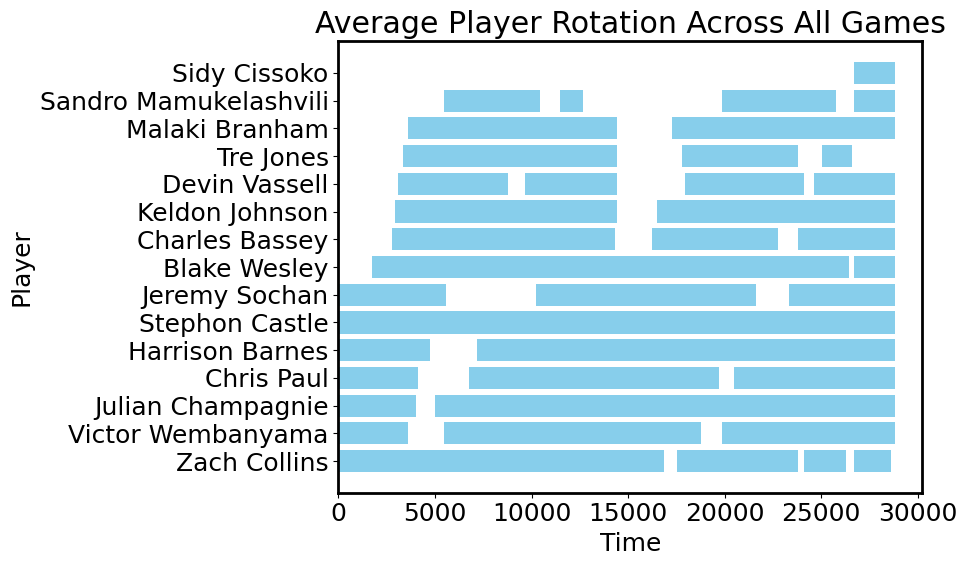

In [88]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 6))

# Plot each player's average stint as a bar
for idx, row in plot_df.iterrows():
    ax.barh(row['Player'], row['End Time'] - row['Start Time'],
            left=row['Start Time'], color='skyblue')

# Add labels and customize
ax.set_xlabel('Time')
ax.set_ylabel('Player')
ax.set_title('Average Player Rotation Across All Games')
plt.tight_layout()
plt.show()

In [89]:
# import plotly.express as px
# import plotly.figure_factory as ff

# # Create a new DataFrame for visualization purposes
# plot_data = []

# # Iterate through each row to expand the list of players and create time intervals for each player
# for idx, row in rotations.iterrows():
#     in_time = row['IN_TIME_REAL']
#     out_time = row['OUT_TIME_REAL']
#     players = row['PLAYER_NAME']

#     # For each player in the current row, create an entry with the corresponding time interval
#     for player in players:
#         plot_data.append({
#             "Player": player,
#             "Start Time": in_time,
#             "End Time": out_time
#         })

# # Convert to a DataFrame for plotting
# plot_df = pd.DataFrame(plot_data)
# plot_df['Start Time'] = plot_df['Start Time'].astype(float)
# plot_df['End Time'] = plot_df['End Time'].astype(float)
# plot_df.rename(columns={'Player':'Task', 'Start Time':'Start', 'End Time':'Finish'}, inplace = True)

In [90]:
# plot_df['time_to_start'] = (plot_df['Start'] - plot_df['Start'].min())
# plot_df['time_to_finish'] = (plot_df['Finish'] - plot_df['Finish'].min())
# # plot_df['task_duration'] = plot_df['time_to_finish'] - plot_df['time_to_start'] + 1
# plot_df['task_duration'] = plot_df['Finish'] - plot_df['Start'] + 1
# plot_df

In [91]:
# import matplotlib.pyplot as plt

# plot_df = plot_df.sort_values(by = 'Start')

# plt.barh(y=plot_df['Task'], width=plot_df['task_duration'], left=plot_df['Start'])
# plt.grid(linestyle='-', alpha=0.7, which = 'major')
# plt.xlabel('Time')
# plt.ylabel('Player')
# plt.title('Rotation Schedule')
# plt.show()


## Shooting Plots

In [92]:
from nba_api.stats.endpoints import shotchartdetail
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt



In [93]:
ray = shotchartdetail.ShotChartDetail(context_measure_simple = 'PTS_2ND_CHANCE', opponent_team_id = '1610612759', team_id = 0, player_id = 0,
                                  season_type_all_star = 'Regular Season', season_nullable = '2024-25').get_data_frames()[0]

ray = ray.loc[ray['SHOT_MADE_FLAG'] == 1]
ray = ray.reset_index()
ray.drop(columns = ['index'], inplace = True)
ray

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0022400015,78,203076,Anthony Davis,1610612747,Los Angeles Lakers,1,6,1,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20241115,SAS,LAL
1,Shot Chart Detail,0022400015,119,203076,Anthony Davis,1610612747,Los Angeles Lakers,1,3,24,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20241115,SAS,LAL
2,Shot Chart Detail,0022400015,131,1631108,Max Christie,1610612747,Los Angeles Lakers,1,2,10,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20241115,SAS,LAL
3,Shot Chart Detail,0022400015,145,2544,LeBron James,1610612747,Los Angeles Lakers,1,1,18,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20241115,SAS,LAL
4,Shot Chart Detail,0022400015,174,1629216,Gabe Vincent,1610612747,Los Angeles Lakers,2,11,35,...,Left Side(L),8-16 ft.,11,-113,5,1,1,20241115,SAS,LAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Shot Chart Detail,0022401218,207,1629638,Nickeil Alexander-Walker,1610612750,Minnesota Timberwolves,2,8,10,...,Left Side Center(LC),16-24 ft.,18,-86,167,1,1,20241215,SAS,MIN
156,Shot Chart Detail,0022401218,332,1629638,Nickeil Alexander-Walker,1610612750,Minnesota Timberwolves,2,0,31,...,Left Side Center(LC),24+ ft.,26,-165,209,1,1,20241215,SAS,MIN
157,Shot Chart Detail,0022401218,464,203944,Julius Randle,1610612750,Minnesota Timberwolves,3,3,30,...,Center(C),Less Than 8 ft.,0,0,0,1,1,20241215,SAS,MIN
158,Shot Chart Detail,0022401218,584,201144,Mike Conley,1610612750,Minnesota Timberwolves,4,6,49,...,Left Side Center(LC),24+ ft.,26,-107,243,1,1,20241215,SAS,MIN


In [94]:
# Function to draw basketball court
def create_court(ax, color):
  # Short corner 3PT lines
  ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
  ax.plot([220, 220], [0, 140], linewidth=2, color=color)
  ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))
  ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
  ax.plot([80, 80], [0, 190], linewidth=2, color=color)
  ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
  ax.plot([60, 60], [0, 190], linewidth=2, color=color)
  ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
  ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))
  ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))
  ax.plot([-30, 30], [40, 40], linewidth=2, color=color)
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_xlim(-250, 250)
  ax.set_ylim(0, 470)

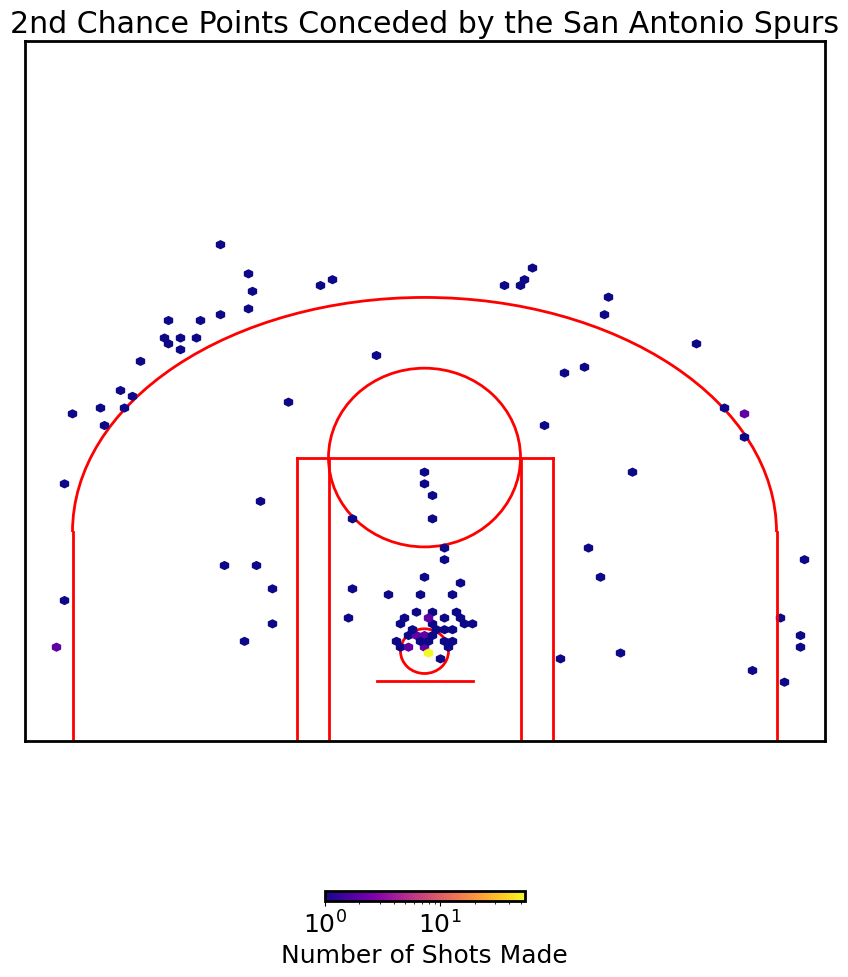

In [95]:
# General plot parameters
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2
# Draw basketball court
fig = plt.figure(figsize=(8, 10))
ax = fig.add_axes([0, 0, 1, 1])
ax = create_court(ax, 'red')
plt.hexbin(ray['LOC_X'], ray['LOC_Y'] + 60, gridsize=(120, 120), extent=(-300, 300, 0, 940), bins='log', cmap='plasma')
cbar = plt.colorbar(shrink = 0.25, location = "bottom", orientation = "horizontal")
cbar.set_label('Number of Shots Made')
plt.title("2nd Chance Points Conceded by the San Antonio Spurs")
plt.show()

In [96]:
df1 = ray[['SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA']].value_counts().reset_index()
df1.rename(columns = {'index':'Shot Zone'}, inplace = True)
total_shots = len(ray)

# df1['Shot Zone Dist'] = round(100*df1['SHOT_ZONE_BASIC']/total_shots, 3)

df1

,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,count
0,Restricted Area,Center(C),89
1,Above the Break 3,Left Side Center(LC),20
2,In The Paint (Non-RA),Center(C),13
3,Above the Break 3,Right Side Center(RC),7
4,Above the Break 3,Center(C),6
5,Mid-Range,Left Side(L),6
6,Mid-Range,Right Side(R),5
7,Right Corner 3,Right Side(R),5
8,Mid-Range,Right Side Center(RC),4
9,Left Corner 3,Left Side(L),3


In [97]:
df2 = ray.groupby(['SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA'])['SHOT_DISTANCE'].mean().reset_index()
df2

,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_DISTANCE
0,Above the Break 3,Center(C),25.166667
1,Above the Break 3,Left Side Center(LC),25.700000
2,Above the Break 3,Right Side Center(RC),25.142857
3,In The Paint (Non-RA),Center(C),6.923077
4,Left Corner 3,Left Side(L),22.333333
5,Mid-Range,Center(C),19.000000
6,Mid-Range,Left Side Center(LC),18.000000
7,Mid-Range,Left Side(L),11.333333
8,Mid-Range,Right Side Center(RC),18.500000
9,Mid-Range,Right Side(R),12.800000


In [98]:
final_df = pd.merge(df1, df2, on = ['SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA'])
final_df

,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,count,SHOT_DISTANCE
0,Restricted Area,Center(C),89,0.550562
1,Above the Break 3,Left Side Center(LC),20,25.700000
2,In The Paint (Non-RA),Center(C),13,6.923077
3,Above the Break 3,Right Side Center(RC),7,25.142857
4,Above the Break 3,Center(C),6,25.166667
5,Mid-Range,Left Side(L),6,11.333333
6,Mid-Range,Right Side(R),5,12.800000
7,Right Corner 3,Right Side(R),5,22.800000
8,Mid-Range,Right Side Center(RC),4,18.500000
9,Left Corner 3,Left Side(L),3,22.333333


In [99]:
import requests
import json

url_base = 'https://stats.nba.com/stats/videoevents'

headers = {
	'Host': 'stats.nba.com',
	'Connection': 'keep-alive',
	'Accept': 'application/json, text/plain, */*',
	'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
	'Referer': 'https://stats.nba.com/',
	"x-nba-stats-origin": "stats",
	"x-nba-stats-token": "true",
	'Accept-Encoding': 'gzip, deflate, br',
	'Accept-Language': 'en-US,en;q=0.9',
	}

parameters = {
  'GameEventID':'78',
  'GameID':'0022400015'
  }

response = requests.get(url_base, params=parameters, headers=headers)

print(response)
content = json.loads(response.content)

print(content.keys())


import pandas as pd

  # transform contents into dataframe
print(content['resultSets']['Meta']['videoUrls'])



<Response [200]>
dict_keys(['resource', 'parameters', 'resultSets'])
[{'uuid': '4549dfbf-fde2-4dcc-8065-afade5ada267', 'dur': None, 'stt': None, 'stp': None, 'sth': None, 'stw': None, 'mtt': None, 'mtp': None, 'mth': None, 'mtw': None, 'ltt': None, 'ltp': None, 'lth': None, 'ltw': None}]


In [100]:
import requests

def url_finder(e_id, g_id):
  headers = {
      'Host': 'stats.nba.com',
      'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:72.0) Gecko/20100101 Firefox/72.0',
      'Accept': 'application/json, text/plain, */*',
      'Accept-Language': 'en-US,en;q=0.5',
      'Accept-Encoding': 'gzip, deflate, br',
      'x-nba-stats-origin': 'stats',
      'x-nba-stats-token': 'true',
      'Connection': 'keep-alive',
      'Referer': 'https://stats.nba.com/',
      'Pragma': 'no-cache',
      'Cache-Control': 'no-cache'
  }
  event_id = e_id
  game_id = g_id
  url = 'https://stats.nba.com/stats/videoeventsasset?GameEventID={}&GameID={}'.format(
              event_id, game_id)
  r = requests.get(url, headers=headers)
  json = r.json()
  video_urls = json['resultSets']['Meta']['videoUrls']
  playlist = json['resultSets']['playlist']
  video_event = {'video': video_urls[0]['lurl'], 'desc': playlist[0]['dsc']}


  return video_event

In [101]:
from tqdm import tqdm

ray['VIDEO_URL'] = ''

for i in tqdm(range(len(ray))):
  time.sleep(2)
  ray.loc[i, 'VIDEO_URL'] = url_finder(ray.loc[i, 'GAME_EVENT_ID'], ray.loc[i, 'GAME_ID'])['video']


100%|██████████| 160/160 [06:10<00:00,  2.32s/it]


In [102]:
for i in range(len(ray)):
  if ray.loc[i, 'VIDEO_URL'] != '':
    print(ray.loc[i, 'VIDEO_URL'])

https://videos.nba.com/nba/pbp/media/2024/11/15/0022400015/78/1d7303ad-ce66-9b3f-5802-b633df732fc6_1280x720.mp4
https://videos.nba.com/nba/pbp/media/2024/11/15/0022400015/119/9d69b60e-08a4-de43-b3a5-331da9e0e2f5_1280x720.mp4
https://videos.nba.com/nba/pbp/media/2024/11/15/0022400015/131/3f97c659-1893-3bcc-df7a-5d5a650f91e0_1280x720.mp4
https://videos.nba.com/nba/pbp/media/2024/11/15/0022400015/145/f3e524de-7091-8aa3-321a-b3c74f8a8f78_1280x720.mp4
https://videos.nba.com/nba/pbp/media/2024/11/15/0022400015/174/f8e8a941-04f8-f937-9e4f-4ec9d05a9efa_1280x720.mp4
https://videos.nba.com/nba/pbp/media/2024/11/15/0022400015/384/20b65180-3ada-3274-e8db-443a40d050b6_1280x720.mp4
https://videos.nba.com/nba/pbp/media/2024/11/15/0022400015/452/d46ca6de-b167-fbea-f9eb-1ba1fbd2d15e_1280x720.mp4
https://videos.nba.com/nba/pbp/media/2024/11/19/0022400025/36/40499efc-3c46-6bd0-4ba7-0821da4e7fce_1280x720.mp4
https://videos.nba.com/nba/pbp/media/2024/11/19/0022400025/387/59a7bace-f873-9dfc-9636-196ecd9772f

In [103]:
ray.columns

Index(['GRID_TYPE', 'GAME_ID', 'GAME_EVENT_ID', 'PLAYER_ID', 'PLAYER_NAME',
       'TEAM_ID', 'TEAM_NAME', 'PERIOD', 'MINUTES_REMAINING',
       'SECONDS_REMAINING', 'EVENT_TYPE', 'ACTION_TYPE', 'SHOT_TYPE',
       'SHOT_ZONE_BASIC', 'SHOT_ZONE_AREA', 'SHOT_ZONE_RANGE', 'SHOT_DISTANCE',
       'LOC_X', 'LOC_Y', 'SHOT_ATTEMPTED_FLAG', 'SHOT_MADE_FLAG', 'GAME_DATE',
       'HTM', 'VTM', 'VIDEO_URL'],
      dtype='object')

In [106]:
ray['TEAM_NAME'].value_counts()

,count
TEAM_NAME,
Utah Jazz,25
Sacramento Kings,22
Dallas Mavericks,21
Houston Rockets,17
Los Angeles Lakers,15
Minnesota Timberwolves,13
Chicago Bulls,10
Oklahoma City Thunder,7
LA Clippers,7


In [108]:
ray.loc[ray['TEAM_NAME'] == 'Sacramento Kings', ['VIDEO_URL']].values

array([[None],
       ['https://videos.nba.com/nba/pbp/media/2024/11/11/0022400216/154/bd63ac8b-cec4-29c9-4e0e-b030218764f9_1280x720.mp4'],
       ['https://videos.nba.com/nba/pbp/media/2024/11/11/0022400216/184/acc67592-7dfe-4baf-b8c1-e66fd4908b92_1280x720.mp4'],
       ['https://videos.nba.com/nba/pbp/media/2024/11/11/0022400216/279/2abeeac6-1dcd-d845-a11b-21d463d483e8_1280x720.mp4'],
       ['https://videos.nba.com/nba/pbp/media/2024/11/11/0022400216/405/bdf68c2b-8dc0-daf0-f462-370087cc0bf3_1280x720.mp4'],
       ['https://videos.nba.com/nba/pbp/media/2024/11/11/0022400216/535/73a8646e-38a9-f4fe-42dc-49383fff1ba3_1280x720.mp4'],
       ['https://videos.nba.com/nba/pbp/media/2024/11/11/0022400216/550/ca5fd4ae-9373-c783-b1ac-6c4050b31320_1280x720.mp4'],
       ['https://videos.nba.com/nba/pbp/media/2024/11/11/0022400216/579/c641b1c2-102b-47bd-80a4-825efa035296_1280x720.mp4'],
       ['https://videos.nba.com/nba/pbp/media/2024/12/01/0022400313/28/b877d304-854e-caa8-fa90-ea6147584078_12

Opponent Second Chance Points Lineups Against Spurs

In [104]:
from nba_api.stats.endpoints import teamdashlineups
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

opp_2nd_chance_pts_lineups = teamdashlineups.TeamDashLineups(team_id = '1610612759',
                                                             season = '2024-25', season_type_all_star = 'Regular Season',
                                                             measure_type_detailed_defense = 'Misc', group_quantity = '5').get_data_frames()[1]

print(opp_2nd_chance_pts_lineups.columns)

opp_2nd_chance_pts_lineups.sort_values(by = ['GP', 'MIN', 'OPP_PTS_2ND_CHANCE'], ascending = [False, False, False], inplace = True)
opp_2nd_chance_pts_lineups = opp_2nd_chance_pts_lineups[['GROUP_NAME', 'GP', 'MIN', 'OPP_PTS_2ND_CHANCE']]
opp_2nd_chance_pts_lineups['OPP_PTS_2ND_CHANCE_per36'] = np.where(opp_2nd_chance_pts_lineups['MIN'] > 0, 36 * opp_2nd_chance_pts_lineups['OPP_PTS_2ND_CHANCE']/opp_2nd_chance_pts_lineups['MIN'], 0)
opp_2nd_chance_pts_lineups.sort_values(by = ['GP', 'OPP_PTS_2ND_CHANCE_per36'], ascending = [False, False], inplace = True)
opp_2nd_chance_pts_lineups[['GROUP_NAME', 'GP', 'OPP_PTS_2ND_CHANCE_per36']]

opp_2nd_chance_pts_lineups

Index(['GROUP_SET', 'GROUP_ID', 'GROUP_NAME', 'GP', 'W', 'L', 'W_PCT', 'MIN',
       'PTS_OFF_TOV', 'PTS_2ND_CHANCE', 'PTS_FB', 'PTS_PAINT',
       'OPP_PTS_OFF_TOV', 'OPP_PTS_2ND_CHANCE', 'OPP_PTS_FB', 'OPP_PTS_PAINT',
       'GP_RANK', 'W_RANK', 'L_RANK', 'W_PCT_RANK', 'MIN_RANK',
       'PTS_OFF_TOV_RANK', 'PTS_2ND_CHANCE_RANK', 'PTS_FB_RANK',
       'PTS_PAINT_RANK', 'OPP_PTS_OFF_TOV_RANK', 'OPP_PTS_2ND_CHANCE_RANK',
       'OPP_PTS_FB_RANK', 'OPP_PTS_PAINT_RANK'],
      dtype='object')


,GROUP_NAME,GP,MIN,OPP_PTS_2ND_CHANCE,OPP_PTS_2ND_CHANCE_per36
0,C. Paul - H. Barnes - J. Champagnie - V. Wemba...,14,151.083333,43.0,10.246001
2,C. Paul - H. Barnes - Z. Collins - J. Champagn...,12,41.866667,10.0,8.598726
1,C. Paul - H. Barnes - J. Champagnie - J. Socha...,11,96.266667,32.0,11.966759
13,C. Paul - H. Barnes - K. Johnson - V. Wembanya...,10,16.085000,7.0,15.666770
6,C. Paul - H. Barnes - K. Johnson - J. Champagn...,8,21.905000,7.0,11.504223
...,...,...,...,...,...
245,C. Bassey - T. Jones - S. Mamukelashvili - J. ...,1,0.000000,0.0,0.000000
246,C. Paul - C. Bassey - S. Mamukelashvili - J. C...,1,0.000000,0.0,0.000000
247,C. Paul - C. Bassey - S. Mamukelashvili - V. W...,1,0.000000,0.0,0.000000
248,C. Paul - H. Barnes - B. Wesley - J. Sochan - ...,1,0.000000,0.0,0.000000


In [105]:
opp_2nd_chance_pts_lineups.columns

Index(['GROUP_NAME', 'GP', 'MIN', 'OPP_PTS_2ND_CHANCE',
       'OPP_PTS_2ND_CHANCE_per36'],
      dtype='object')

#Shooting Splits

In [109]:
# import requests
# import json

# url_base = 'https://stats.nba.com/stats/teamdashboardbyshootingsplits'

# headers = {
# 	'Host': 'stats.nba.com',
# 	'Connection': 'keep-alive',
# 	'Accept': 'application/json, text/plain, */*',
# 	'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
# 	'Referer': 'https://stats.nba.com/',
# 	"x-nba-stats-origin": "stats",
# 	"x-nba-stats-token": "true",
# 	'Accept-Encoding': 'gzip, deflate, br',
# 	'Accept-Language': 'en-US,en;q=0.9',
# 	}

# parameters = {
#   'MeasureType':'Scoring',

#   }

# response = requests.get(url_base, params=parameters, headers=headers)

# print(response)
# content = json.loads(response.content)

# print(content.keys())


# import pandas as pd

#   # transform contents into dataframe
# print(content['resultSets']['Meta']['videoUrls'])



League Shooting

In [174]:
from nba_api.stats.endpoints import leaguedashteamshotlocations

shot_locations_df = leaguedashteamshotlocations.LeagueDashTeamShotLocations(distance_range = 'By Zone', measure_type_simple = 'Opponent', pace_adjust = 'Y',
                                                                            per_mode_detailed = 'Per100Possessions', plus_minus = 'N', rank = 'Y',
                                                                            season = '2024-25', season_type_all_star = 'Regular Season').get_data_frames()[0]
shot_locations_df

SHOT_CATEGORY                                     Restricted Area          \
columns           TEAM_ID               TEAM_NAME         OPP_FGM OPP_FGA   
0              1610612737           Atlanta Hawks            25.5    40.0   
1              1610612738          Boston Celtics            38.5    58.4   
2              1610612751           Brooklyn Nets            34.3    50.7   
3              1610612766       Charlotte Hornets            33.4    52.5   
4              1610612741           Chicago Bulls            35.6    52.5   
5              1610612739     Cleveland Cavaliers            25.6    41.8   
6              1610612742        Dallas Mavericks            30.0    47.5   
7              1610612743          Denver Nuggets            26.3    38.8   
8              1610612765         Detroit Pistons            27.1    42.0   
9              1610612744   Golden State Warriors            24.0    37.6   
10             1610612745         Houston Rockets            26.2    42.9   
11             1610612754          Indiana Pacers            32.1    48.8   
12             1610612746             LA Clippers            30.9    43.8   
13             1610612747      Los Angeles Lakers            31.2    45.3   
14             1610612763       Memphis Grizzlies            29.8    46.8   
15             1610612748              Miami Heat            30.7    47.1   
16             1610612749         Milwaukee Bucks            29.1    46.8   
17             1610612750  Minnesota Timberwolves            31.7    48.2   
18             1610612740    New Orleans Pelicans            36.2    53.6   
19             1610612752         New York Knicks            30.6    47.9   
20             1610612760   Oklahoma City Thunder            26.0    43.4   
21             1610612753           Orlando Magic            24.6    38.5   
22             1610612755      Philadelphia 76ers            31.2    44.6   
23             1610612756            Phoenix Suns            42.0    63.0   
24             1610612757  Portland Trail Blazers            25.9    37.6   
25             1610612758        Sacramento Kings            29.3    44.5   
26             1610612759       San Antonio Spurs            29.5    47.2   
27             1610612761         Toronto Raptors            26.6    39.8   
28             1610612762               Utah Jazz            33.7    47.5   
29             1610612764      Washington Wizards            31.8    45.7   

SHOT_CATEGORY            In The Paint (Non-RA)                    Mid-Range  \
columns       OPP_FG_PCT               OPP_FGM OPP_FGA OPP_FG_PCT   OPP_FGM   
0                  0.637                  12.2    28.6      0.426      19.8   
1                  0.660                  24.9    57.7      0.431      18.0   
2                  0.676                  17.0    37.7      0.452      15.1   
3                  0.637                  14.4    33.6      0.427      13.8   
4                  0.679                  19.5    47.3      0.412      19.4   
5                  0.612                  19.5    45.3      0.430      15.7   
6                  0.632                  17.6    39.8      0.442      12.3   
7                  0.677                  17.5    40.5      0.433      13.1   
8                  0.645                  19.3    43.9      0.440      16.5   
9                  0.640                  20.5    46.6      0.439      21.2   
10                 0.611                  14.9    38.6      0.386      11.1   
11                 0.657                  16.3    35.8      0.455      12.9   
12                 0.707                  13.3    30.8      0.432      15.0   
13                 0.688                  18.6    44.2      0.421      11.8   
14                 0.638                  11.6    28.7      0.405      16.7   
15                 0.651                  16.2    35.8      0.454      15.9   
16                 0.622                  23.2    56.8      0.409      12.1   
17                 0.658          

In [175]:
shot_locations_df.columns

MultiIndex([(                     '',    'TEAM_ID'),
            (                     '',  'TEAM_NAME'),
            (      'Restricted Area',    'OPP_FGM'),
            (      'Restricted Area',    'OPP_FGA'),
            (      'Restricted Area', 'OPP_FG_PCT'),
            ('In The Paint (Non-RA)',    'OPP_FGM'),
            ('In The Paint (Non-RA)',    'OPP_FGA'),
            ('In The Paint (Non-RA)', 'OPP_FG_PCT'),
            (            'Mid-Range',    'OPP_FGM'),
            (            'Mid-Range',    'OPP_FGA'),
            (            'Mid-Range', 'OPP_FG_PCT'),
            (        'Left Corner 3',    'OPP_FGM'),
            (        'Left Corner 3',    'OPP_FGA'),
            (        'Left Corner 3', 'OPP_FG_PCT'),
            (       'Right Corner 3',    'OPP_FGM'),
            (       'Right Corner 3',    'OPP_FGA'),
            (       'Right Corner 3', 'OPP_FG_PCT'),
            (    'Above the Break 3',    'OPP_FGM'),
            (    'Above the Break 3',    'OPP_

In [135]:
#Paint
fga_df = shot_locations_df.loc[:, [('', 'TEAM_NAME'), ('Restricted Area', 'FGA'), ('In The Paint (Non-RA)', 'FGA'),
                                   ('Restricted Area', 'FGM'), ('In The Paint (Non-RA)', 'FGM'),
                                   ('Restricted Area', 'FG_PCT'), ('In The Paint (Non-RA)', 'FG_PCT')]]

fga_df.columns = fga_df.columns.map('_'.join)
fga_df.rename(columns = {'_TEAM_NAME': 'TEAM_NAME'}, inplace = True)

fga_df['Paint_FGA'] = fga_df['Restricted Area_FGA'] + fga_df['In The Paint (Non-RA)_FGA']
fga_df['Paint_FGM'] = fga_df['Restricted Area_FGM'] + fga_df['In The Paint (Non-RA)_FGM']
fga_df['Paint_FG_PCT'] = np.round(fga_df['Paint_FGM']/fga_df['Paint_FGA'], 3)

fga_df.sort_values(by = ['Paint_FGA'], ascending = False, inplace = True)
fga_df['rank'] = list(range(1, 31))

fga_df.reset_index(drop = True, inplace = True)
fga_df

,TEAM_NAME,Restricted Area_FGA,In The Paint (Non-RA)_FGA,Restricted Area_FGM,In The Paint (Non-RA)_FGM,Restricted Area_FG_PCT,In The Paint (Non-RA)_FG_PCT,Paint_FGA,Paint_FGM,Paint_FG_PCT,rank
0,Golden State Warriors,47.0,40.7,30.4,16.6,0.647,0.409,87.7,47.0,0.536,1
1,Toronto Raptors,46.9,40.6,29.0,17.8,0.618,0.439,87.5,46.8,0.535,2
2,Atlanta Hawks,46.1,41.3,29.3,17.0,0.637,0.412,87.4,46.3,0.530,3
3,Oklahoma City Thunder,46.2,40.9,30.4,18.1,0.658,0.443,87.1,48.5,0.557,4
4,Miami Heat,46.7,40.1,29.0,16.3,0.622,0.407,86.8,45.3,0.522,5
5,Washington Wizards,46.6,40.1,31.4,15.7,0.674,0.390,86.7,47.1,0.543,6
6,Memphis Grizzlies,46.9,39.4,33.8,17.2,0.719,0.437,86.3,51.0,0.591,7
7,LA Clippers,45.7,40.5,29.2,17.4,0.638,0.430,86.2,46.6,0.541,8
8,New Orleans Pelicans,45.6,40.4,28.1,15.0,0.617,0.373,86.0,43.1,0.501,9
9,New York Knicks,45.9,39.9,31.0,18.4,0.676,0.462,85.8,49.4,0.576,10


In [177]:
#Opponent Paint
fga_df = shot_locations_df.loc[:, [('', 'TEAM_NAME'), ('Restricted Area', 'OPP_FGA'), ('In The Paint (Non-RA)', 'OPP_FGA'),
                                   ('Restricted Area', 'OPP_FGM'), ('In The Paint (Non-RA)', 'OPP_FGM'),
                                   ('Restricted Area', 'OPP_FG_PCT'), ('In The Paint (Non-RA)', 'OPP_FG_PCT')]]

fga_df.columns = fga_df.columns.map('_'.join)
fga_df.rename(columns = {'_TEAM_NAME': 'TEAM_NAME'}, inplace = True)

fga_df['Paint_OPP_FGA'] = fga_df['Restricted Area_OPP_FGA'] + fga_df['In The Paint (Non-RA)_OPP_FGA']
fga_df['Paint_OPP_FGM'] = fga_df['Restricted Area_OPP_FGM'] + fga_df['In The Paint (Non-RA)_OPP_FGM']
fga_df['Paint_OPP_FG_PCT'] = np.round(fga_df['Paint_OPP_FGM']/fga_df['Paint_OPP_FGA'], 3)

fga_df.sort_values(by = ['Paint_OPP_FG_PCT'], ascending = True, inplace = True)
fga_df['rank'] = list(range(1, 31))

fga_df.reset_index(drop = True, inplace = True)
fga_df

,TEAM_NAME,Restricted Area_OPP_FGA,In The Paint (Non-RA)_OPP_FGA,Restricted Area_OPP_FGM,In The Paint (Non-RA)_OPP_FGM,Restricted Area_OPP_FG_PCT,In The Paint (Non-RA)_OPP_FG_PCT,Paint_OPP_FGA,Paint_OPP_FGM,Paint_OPP_FG_PCT,rank
0,Houston Rockets,42.9,38.6,26.2,14.9,0.611,0.386,81.5,41.1,0.504,1
1,Milwaukee Bucks,46.8,56.8,29.1,23.2,0.622,0.409,103.6,52.3,0.505,2
2,Oklahoma City Thunder,43.4,37.1,26.0,15.1,0.600,0.408,80.5,41.1,0.511,3
3,Cleveland Cavaliers,41.8,45.3,25.6,19.5,0.612,0.430,87.1,45.1,0.518,4
4,Orlando Magic,38.5,44.9,24.6,18.7,0.641,0.417,83.4,43.3,0.519,5
5,Portland Trail Blazers,37.6,40.0,25.9,14.8,0.688,0.371,77.6,40.7,0.524,6
6,Golden State Warriors,37.6,46.6,24.0,20.5,0.640,0.439,84.2,44.5,0.529,7
7,San Antonio Spurs,47.2,43.2,29.5,19.1,0.625,0.442,90.4,48.6,0.538,8
8,Detroit Pistons,42.0,43.9,27.1,19.3,0.645,0.440,85.9,46.4,0.540,9
9,Minnesota Timberwolves,48.2,44.2,31.7,18.6,0.658,0.422,92.4,50.3,0.544,10


In [180]:
#Opponent Mid Range
fga_df = shot_locations_df.loc[:, [('', 'TEAM_NAME'), ('Mid-Range', 'OPP_FGA'), ('Mid-Range', 'OPP_FGM'), ('Mid-Range', 'OPP_FG_PCT')]]

fga_df.columns = fga_df.columns.map('_'.join)
fga_df.rename(columns = {'_TEAM_NAME': 'TEAM_NAME'}, inplace = True)

fga_df.sort_values(by = ['Mid-Range_OPP_FG_PCT'], ascending = True, inplace = True)
fga_df['rank'] = list(range(1, 31))

fga_df.reset_index(drop = True, inplace = True)
fga_df

,TEAM_NAME,Mid-Range_OPP_FGA,Mid-Range_OPP_FGM,Mid-Range_OPP_FG_PCT,rank
0,Toronto Raptors,34.6,11.5,0.333,1
1,Miami Heat,46.3,15.9,0.343,2
2,New Orleans Pelicans,21.9,7.5,0.343,3
3,Houston Rockets,31.6,11.1,0.351,4
4,Dallas Mavericks,34.6,12.3,0.356,5
5,Philadelphia 76ers,28.1,10.3,0.366,6
6,Phoenix Suns,31.0,11.5,0.370,7
7,Oklahoma City Thunder,28.8,10.8,0.373,8
8,Cleveland Cavaliers,41.2,15.7,0.381,9
9,LA Clippers,39.0,15.0,0.385,10


In [140]:
#3s
fga_df = shot_locations_df.loc[:, [('', 'TEAM_NAME'),
                                   ('Left Corner 3', 'FGA'), ('Right Corner 3', 'FGA'), ('Corner 3', 'FGA'), ('Above the Break 3', 'FGA'),
                                   ('Left Corner 3', 'FGM'), ('Right Corner 3', 'FGM'), ('Corner 3', 'FGM'), ('Above the Break 3', 'FGM'),
                                   ('Left Corner 3', 'FG_PCT'), ('Right Corner 3', 'FG_PCT'), ('Corner 3', 'FG_PCT'), ('Above the Break 3', 'FG_PCT')]]

fga_df.columns = fga_df.columns.map('_'.join)
fga_df.rename(columns = {'_TEAM_NAME': 'TEAM_NAME'}, inplace = True)

fga_df.sort_values(by = ['Corner 3_FG_PCT'], ascending = False, inplace = True)
fga_df['rank'] = list(range(1, 31))

fga_df.reset_index(drop = True, inplace = True)
fga_df

,TEAM_NAME,Left Corner 3_FGA,Right Corner 3_FGA,Corner 3_FGA,Above the Break 3_FGA,Left Corner 3_FGM,Right Corner 3_FGM,Corner 3_FGM,Above the Break 3_FGM,Left Corner 3_FG_PCT,Right Corner 3_FG_PCT,Corner 3_FG_PCT,Above the Break 3_FG_PCT,rank
0,Milwaukee Bucks,50.2,50.2,100.0,45.8,25.6,23.8,49.1,16.3,0.510,0.474,0.491,0.357,1
1,Indiana Pacers,48.6,50.2,97.2,46.8,22.1,21.5,42.9,16.7,0.454,0.429,0.441,0.357,2
2,Utah Jazz,49.0,49.2,95.4,45.0,20.6,21.6,40.9,14.9,0.420,0.438,0.429,0.332,3
3,Denver Nuggets,50.3,50.0,100.0,46.1,20.4,22.5,42.9,17.3,0.405,0.450,0.429,0.375,4
4,LA Clippers,49.2,49.8,98.4,44.7,19.8,22.4,42.0,16.1,0.404,0.449,0.427,0.360,5
5,Phoenix Suns,49.6,50.5,99.5,45.2,23.5,19.1,42.2,16.6,0.474,0.378,0.424,0.367,6
6,Cleveland Cavaliers,49.5,50.3,99.6,47.5,20.9,20.3,41.2,18.8,0.423,0.404,0.414,0.395,7
7,Golden State Warriors,49.6,49.4,97.1,45.6,20.6,20.1,40.0,16.6,0.416,0.407,0.412,0.365,8
8,Atlanta Hawks,49.0,49.5,97.3,44.9,19.8,20.2,39.5,14.3,0.403,0.408,0.406,0.318,9
9,Sacramento Kings,49.6,49.1,97.0,47.2,19.1,20.9,39.1,15.4,0.386,0.426,0.403,0.326,10


In [185]:
#Opponent 3s
fga_df = shot_locations_df.loc[:, [('', 'TEAM_NAME'),
                                   ('Left Corner 3', 'OPP_FGA'), ('Right Corner 3', 'OPP_FGA'), ('Corner 3', 'OPP_FGA'), ('Above the Break 3', 'OPP_FGA'),
                                   ('Left Corner 3', 'OPP_FGM'), ('Right Corner 3', 'OPP_FGM'), ('Corner 3', 'OPP_FGM'), ('Above the Break 3', 'OPP_FGM'),
                                   ('Left Corner 3', 'OPP_FG_PCT'), ('Right Corner 3', 'OPP_FG_PCT'), ('Corner 3', 'OPP_FG_PCT'), ('Above the Break 3', 'OPP_FG_PCT')]]

fga_df.columns = fga_df.columns.map('_'.join)
fga_df.rename(columns = {'_TEAM_NAME': 'TEAM_NAME'}, inplace = True)

fga_df.sort_values(by = ['Above the Break 3_OPP_FG_PCT'], ascending = True, inplace = True)
fga_df['rank'] = list(range(1, 31))

fga_df.reset_index(drop = True, inplace = True)
fga_df

,TEAM_NAME,Left Corner 3_OPP_FGA,Right Corner 3_OPP_FGA,Corner 3_OPP_FGA,Above the Break 3_OPP_FGA,Left Corner 3_OPP_FGM,Right Corner 3_OPP_FGM,Corner 3_OPP_FGM,Above the Break 3_OPP_FGM,Left Corner 3_OPP_FG_PCT,Right Corner 3_OPP_FG_PCT,Corner 3_OPP_FG_PCT,Above the Break 3_OPP_FG_PCT,rank
0,Oklahoma City Thunder,55.7,71.0,123.2,40.9,19.2,28.3,45.9,13.0,0.345,0.399,0.372,0.317,1
1,Golden State Warriors,46.0,50.2,94.1,41.1,15.9,23.0,37.7,13.1,0.346,0.458,0.401,0.320,2
2,Minnesota Timberwolves,39.2,39.1,76.5,41.3,12.1,14.6,26.0,13.8,0.308,0.373,0.340,0.333,3
3,Houston Rockets,58.5,39.6,93.3,44.4,19.3,15.9,33.9,15.0,0.330,0.400,0.364,0.338,4
4,LA Clippers,51.7,48.5,99.6,49.4,17.7,19.8,37.3,16.7,0.342,0.409,0.374,0.338,5
5,Memphis Grizzlies,38.7,48.1,84.9,54.3,12.8,14.5,26.9,18.4,0.331,0.301,0.316,0.340,6
6,Chicago Bulls,33.6,48.7,79.7,42.6,13.0,16.0,28.4,14.6,0.388,0.328,0.356,0.342,7
7,Toronto Raptors,46.3,50.7,92.7,58.2,22.0,15.9,36.4,19.9,0.474,0.315,0.393,0.342,8
8,Boston Celtics,30.0,37.4,65.8,32.6,9.6,17.1,25.4,11.2,0.320,0.457,0.386,0.343,9
9,New York Knicks,56.2,44.1,99.5,49.4,21.7,20.8,42.1,16.9,0.386,0.471,0.423,0.343,10
